In [2]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import image
from matplotlib import pyplot as plt
import joblib

def load_file(datapath):
    with open(datapath, 'rb') as file:
        data = joblib.load(file)
        file.close()
    return data

resultdir = 'S:/pools/t/T-IDP-Projekte-u-Vorlesungen/Meteoblue/QRF/Data/QRF Inference/2023-12-5_8.54/'
resultpath = os.path.join(resultdir, os.path.basename(os.path.normpath(resultdir)) + '.json')
inferencedatapath = 'C:/Users/ushe/Documents/LinuxDownload/mb_4_multi_stations_xy_N02.00m_featuremaps.json'
palmfile = os.path.basename(inferencedatapath).split('_featuremaps')[0]

# DATA
results = load_file(resultpath)
inferencedata = load_file(inferencedatapath)
palmboundary = load_file(f'S:/pools/t/T-IDP-Projekte-u-Vorlesungen/Meteoblue/QRF/Data/PALM/{palmfile}_boundary.z')


# FEATURES
spatial_features = ['altitude', 'buildings', 'forests', 'pavedsurfaces', 'surfacewater', 'urbangreen']

# Geofeature Analysis
Geofeatures aren't loaded properly, when plotting the generated features, we get uniform maps which do not correspond to the original `.tif` files. The original inference geofeatures are plotted below (convolutions excluded) and subsequently the original maps from the `.tif` files.

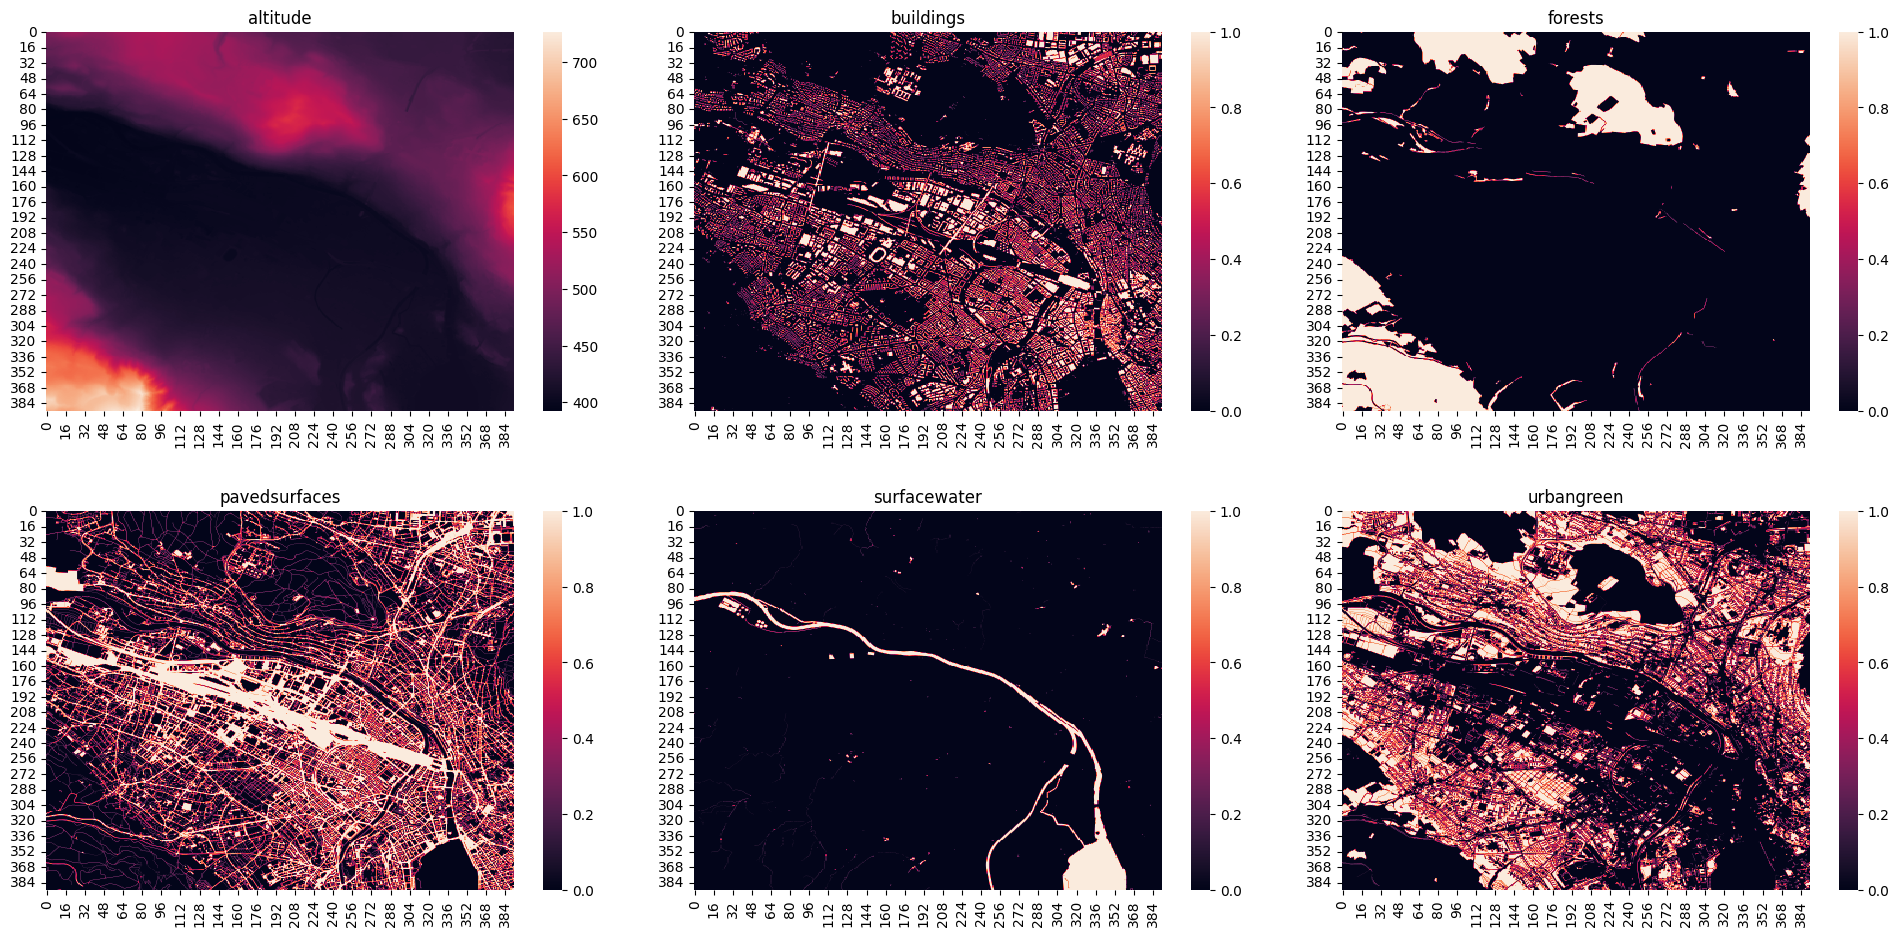

In [19]:
fig, axs = plt.subplots(2, 3, figsize=(20,10))
for i, feature in enumerate(spatial_features):
    ax = sns.heatmap(inferencedata[feature][0, :, :], ax=axs[i//3, i%3])
    ax.set_title(feature)
fig.tight_layout(pad=3.0)

In [20]:
key = 'buildings_10'
print(np.sum(inferencedata[key] == 'nan'))
type(inferencedata[key][0, 0, 0]) == np.nan
inferencedata[key][0, 0, 0]

0


nan

In [5]:
for key in inferencedata.keys():
    print(f'geofeature {key}:\n\tmax = {np.nanmax(inferencedata[key])}\n\tmin = {np.nanmin(inferencedata[key])}')
    contains_nans = np.sum(inferencedata[key][inferencedata[key] == np.nan])
    if contains_nans < 0:
        print('Contains NaNs')

UFuncTypeError: ufunc 'fmax' did not contain a loop with signature matching types (dtype('<U20'), dtype('<U20')) -> None

In [23]:
for feature in spatial_features:
    print(f'geofeature {feature}:\n\tmax = {np.max(inferencedata[feature])}\n\tmin = {np.min(inferencedata[feature])}')
    contains_nans = np.sum(inferencedata[feature][inferencedata[feature] == np.nan])
    if contains_nans < 0:
        print('Contains NaNs')

geofeature altitude:
	max = 726.68212890625
	min = 392.6971435546875
geofeature buildings:
	max = 1.0
	min = 0.0
geofeature forests:
	max = 1.0
	min = 0.0
geofeature pavedsurfaces:
	max = 1.0
	min = 0.0
geofeature surfacewater:
	max = 1.0
	min = 0.0
geofeature urbangreen:
	max = 1.0
	min = 0.0


In [4]:
shape = inferencedata['irradiation'].shape
print(inferencedata['irradiation'])

[[[24.24508979 24.24508979 24.24508979 ... 24.24508979 24.24508979
   24.24508979]
  [24.24508979 24.24508979 24.24508979 ... 24.24508979 24.24508979
   24.24508979]
  [24.24508979 24.24508979 24.24508979 ... 24.24508979 24.24508979
   24.24508979]
  ...
  [24.24508979 24.24508979 24.24508979 ... 24.24508979 24.24508979
   24.24508979]
  [24.24508979 24.24508979 24.24508979 ... 24.24508979 24.24508979
   24.24508979]
  [24.24508979 24.24508979 24.24508979 ... 24.24508979 24.24508979
   24.24508979]]

 [[ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  ...
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]]

 [[ 0.          0.          0.      

First row has data, the rest does not. 

In [7]:
import rasterio

def lv03_to_lv95(lv03_lat: float, lv03_lon: float):
    return lv03_lat + 1000000, lv03_lon + 2000000

def load_geomap(path):
    featuremap = rasterio.open(path)
    geo_N = featuremap.meta['transform'][5]  # gives northern boundary
    geo_W = featuremap.meta['transform'][2]  # gives western boundary
    # transform to LV95 coordinates
    geo_N, geo_W = lv03_to_lv95(geo_N, geo_W)
    geo_S = geo_N - featuremap.shape[1]
    geo_E = geo_W + featuremap.shape[0]
    featuremap = featuremap.read()[0, :, :]
    featuremap[featuremap < 0] = 0
    borders = {'N': geo_N, 'S': geo_S, 'W': geo_W, 'E': geo_E}
    return featuremap, borders

In [8]:
def load_geomap(path):
    featuremap = rasterio.open(path)
    geo_N = featuremap.meta['transform'][5]  # gives northern boundary
    geo_W = featuremap.meta['transform'][2]  # gives western boundary
    # transform to LV95 coordinates
    geo_N, geo_W = lv03_to_lv95(geo_N, geo_W)
    geo_S = geo_N - featuremap.shape[1]
    geo_E = geo_W + featuremap.shape[0]
    featuremap = featuremap.read()[0, :, :]
    featuremap[featuremap < 0] = 0
    borders = {'N': geo_N, 'S': geo_S, 'W': geo_W, 'E': geo_E}
    return featuremap, borders

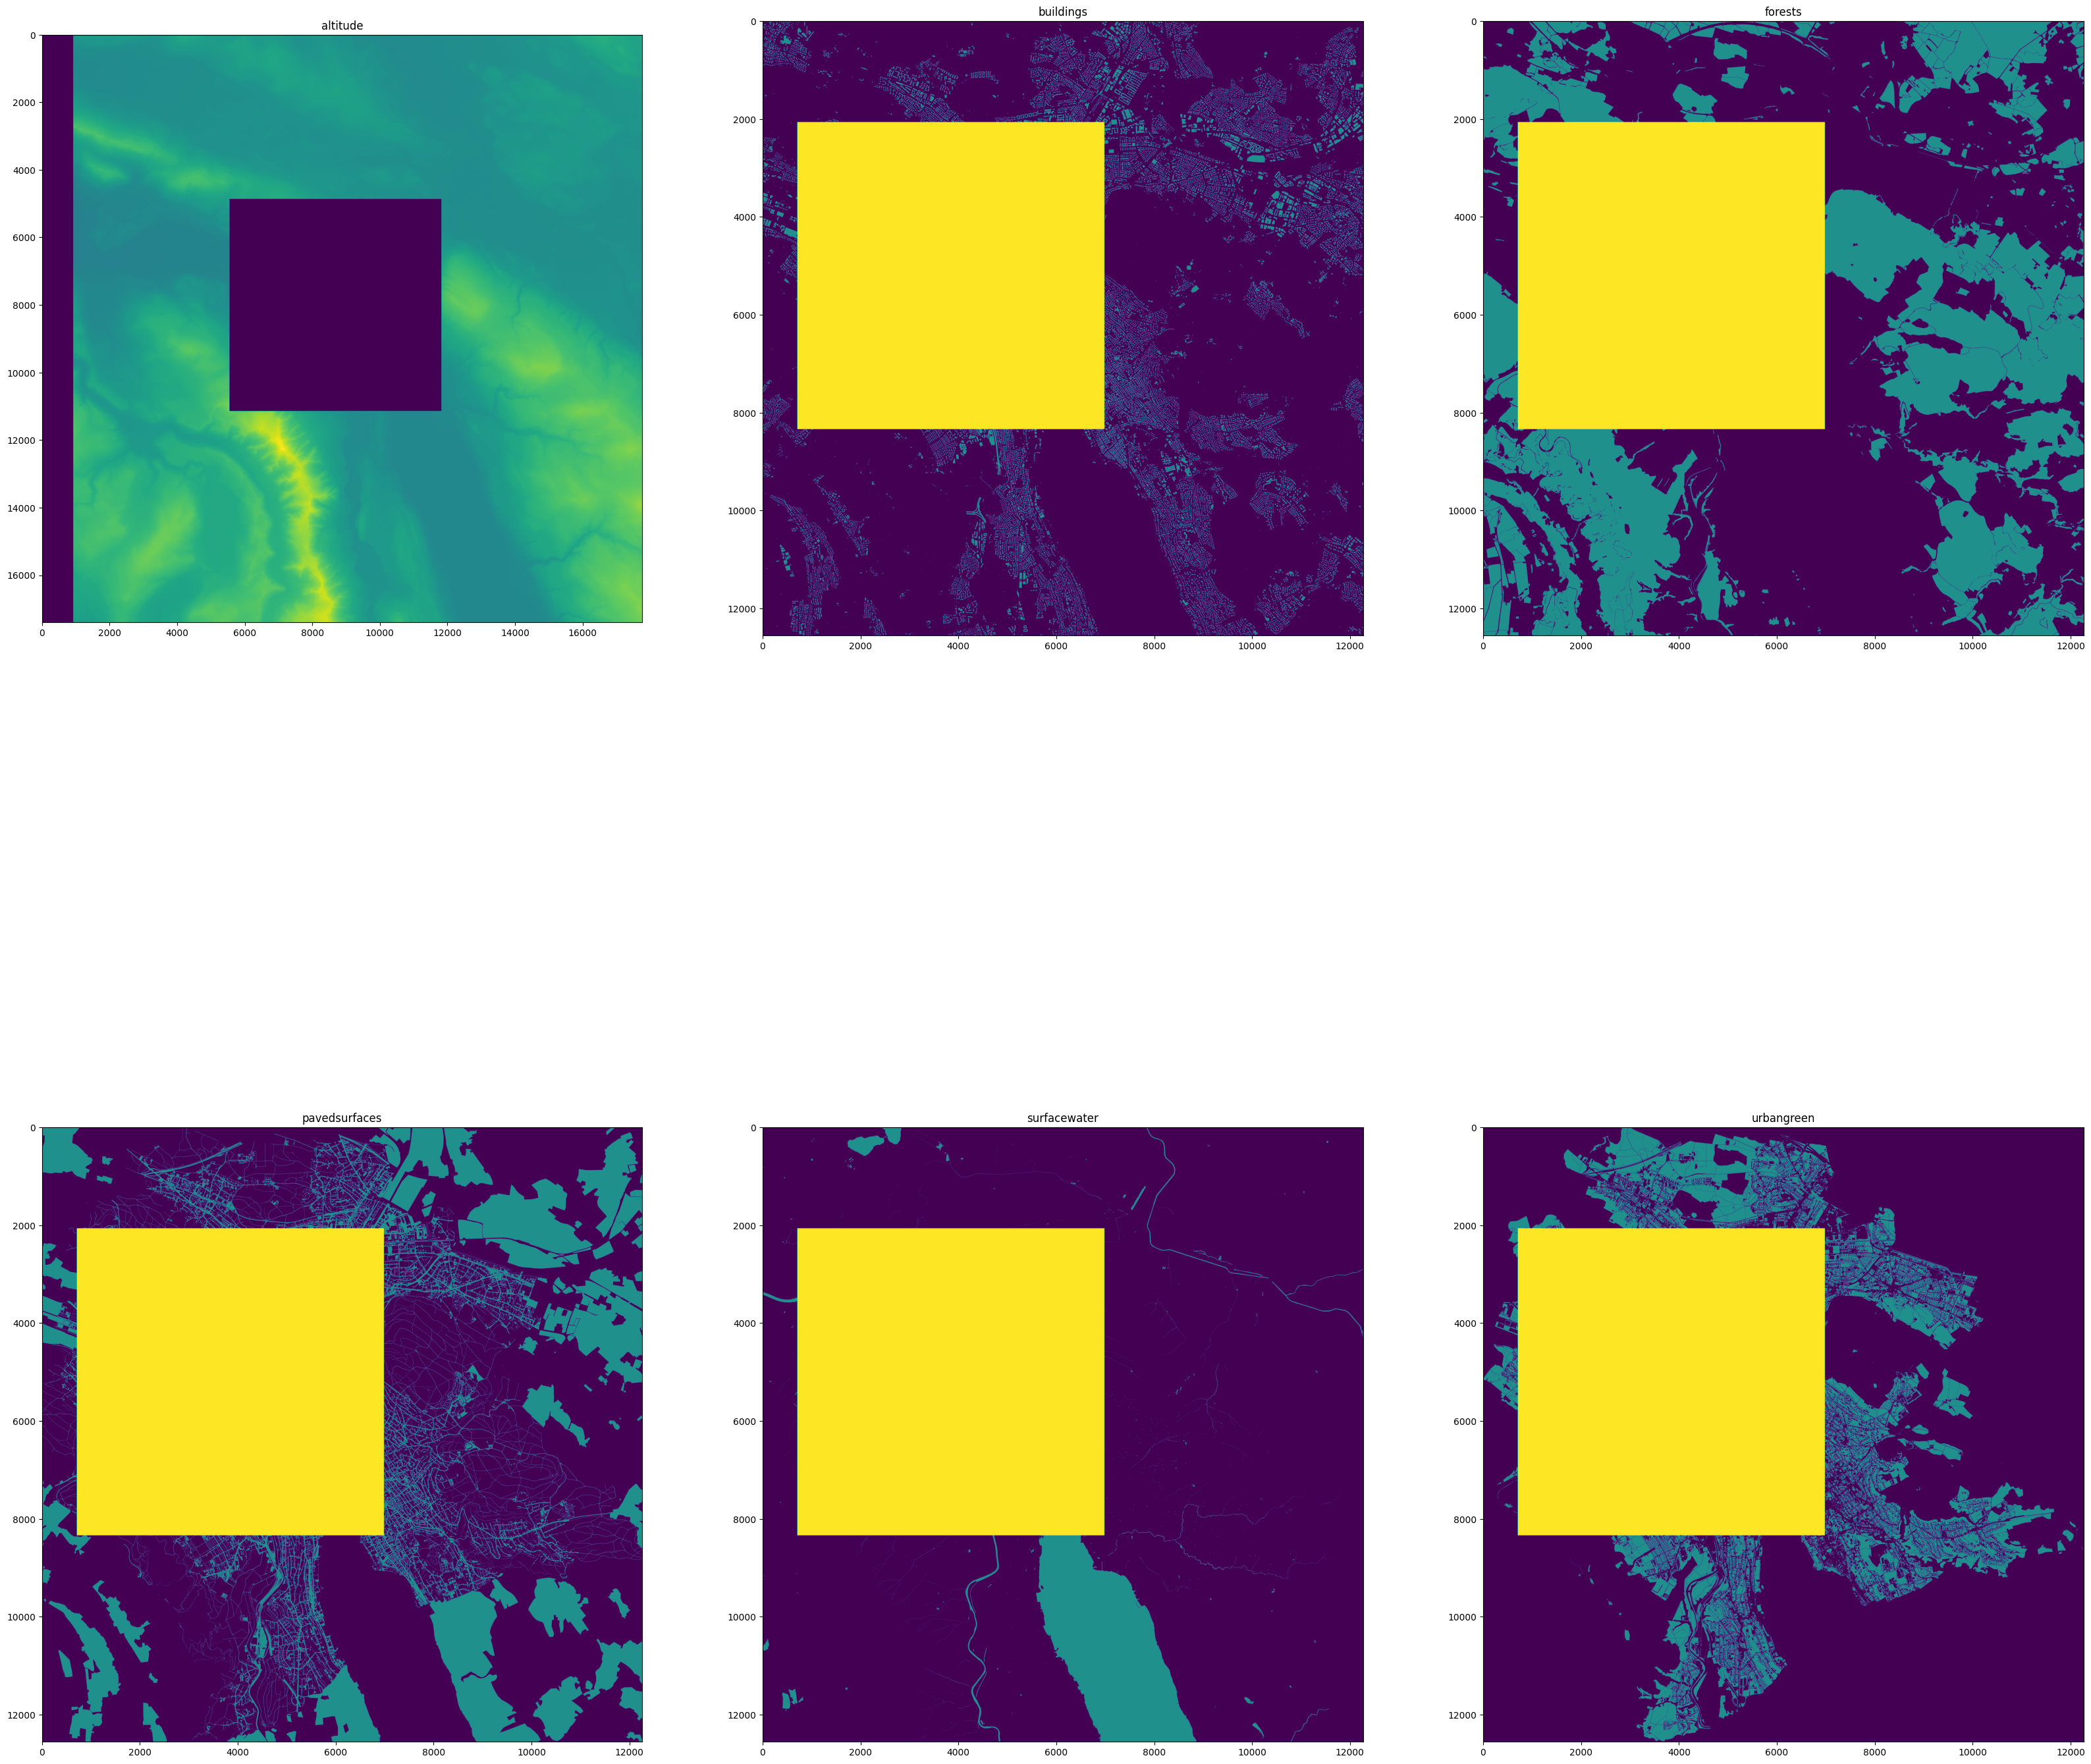

In [9]:
import os
import rasterio
geopath = 'S:/pools/t/T-IDP-Projekte-u-Vorlesungen/Meteoblue/QRF/Data/geodata'
fig, axs = plt.subplots(2, 3, figsize=(40,40))
for i, feature in enumerate(spatial_features):
    path = os.path.join(geopath, f'{feature}.tif')
    featuremap, geo_border = load_geomap(path)
    # indices locating the PALM simulation map in the geofeature map
    palm_geoidxs = {'N': int(np.round(geo_border['N'] - palmboundary['CH_N'])),
                    'S': int(np.round(geo_border['N'] - palmboundary['CH_S'])),
                    'W': int(np.round(palmboundary['CH_W'] - geo_border['W'])),
                    'E': int(np.round(palmboundary['CH_E'] - geo_border['W']))}
    featuremap[palm_geoidxs['N']:palm_geoidxs['S'], palm_geoidxs['W']:palm_geoidxs['E']] = 2
    axs[i//3, i%3].imshow(featuremap)
    axs[i//3, i%3].set_title(feature)


The PALM feature maps are well within the boundaries of the geofeature maps, so the missing values must come from an error in the code. 

In [13]:
feature = feaeture_raster.read()[0, :, :]
print(f'max feature: {np.max(feature)}')
print(f'min feature: {np.min(feature)}')

max feature: 1.0
min feature: 0.0


Altitude is incorrect, upon analysing the maximum and minimum values, it 

In [36]:
altitude_origin = rasterio.open(os.path.join(geopath, 'altitude.tif')).read()

min altitude: 380.6220703125
max altitude: 872.0078735351562


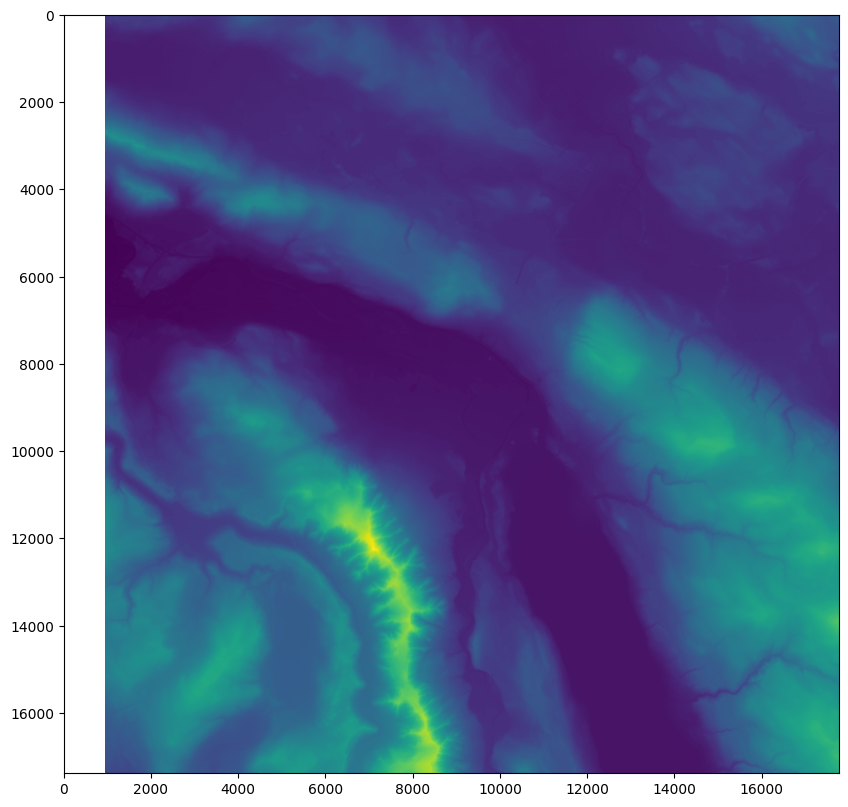

In [26]:
altitude = rasterio.open(os.path.join(geopath, 'altitude.tif')).read()[0, :, :]
altitude[altitude < 0] = np.nan
print(f'min altitude: {np.nanmin(altitude)}')
print(f'max altitude: {np.nanmax(altitude)}')
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(altitude)

There is a small band of the altitude `.tif` where no data is available, which has a very small negative value rather than nan or 0, so by replacing these missing values with nan, we can see the altitude details. 

With regards to the missing geofeature data in the inference feature maps, it is most likely that an error ocurred during the loading of these maps and calculation of their convolutions. The function `generate_geomap` from the `feature_generation.py` script was reworked and the resulting geofeatures ...